In [1]:
import pandas as pd
import os
import zipfile
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade pandas xlrd

In [3]:
download_path = ('c:\\Users\\jigya\\Downloads\\titanic_train(1).csv')
save_path = ('c:\\Users\\jigya\\Desktop\\titanic_train(1).csv')

In [4]:
import os

file_path = ('c:\\Users\\jigya\\Downloads\\titanic_train.csv')
print(os.path.exists(file_path))

True


In [6]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Data Analysis and visualization
Understanding the Column attributes

PassengerId - id of each passenger

Survived - Has 2 values - 0 and 1:

Survived - 1
Not Survived - 0
Pclass - Passenger's class:

Upper Class - 1st
Middle Class - 2nd
Lower Class - 3rd
Name - Passenger's name

Sex - Passenger's Gender

Age - Passenger's Age in years

SibSp - Passenger's siblings and spouses

Parch - Passenger's parents and children

Ticket - Passenger's ticket number

Fare - Passenger's ticket price

Cabin - Passenger's cabin number

Embarked - Port of entry:

C - Cherbourg
Q - Queenstown
S - Southampton

In [12]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [13]:
print(df['Survived'].unique())

[0 1]


In [14]:
print(df['Pclass'].unique())

[3 1 2]


In [15]:
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Total females
totalFemales = len(df[df.Sex == 'female'])
# Total males
totalMales = len(df[df.Sex == 'male'])

# We added total 1s in the 'Survived' col each of female and male category
femalesSurvived = df.loc[df.Sex == 'female']['Survived'].values.sum()
malesSurvived = df.loc[df.Sex == 'male']['Survived'].values.sum()

print('Total females survived: ', femalesSurvived, '/', totalFemales, 'i.e', round(femalesSurvived*100/totalFemales,2), '% survival rate')
print('Total males survived: ', malesSurvived, '/', totalMales, 'i.e', round(malesSurvived*100/totalMales,2), '% survival rate')

Total females survived:  233 / 314 i.e 74.2 % survival rate
Total males survived:  109 / 577 i.e 18.89 % survival rate


The above mathematical calculations show that rate of female survival was more than that of male survival.

Hence the 'Sex' attribute plays an importance in the analysis.

Text(0.5, 1.0, 'Sex-wise survival rate')

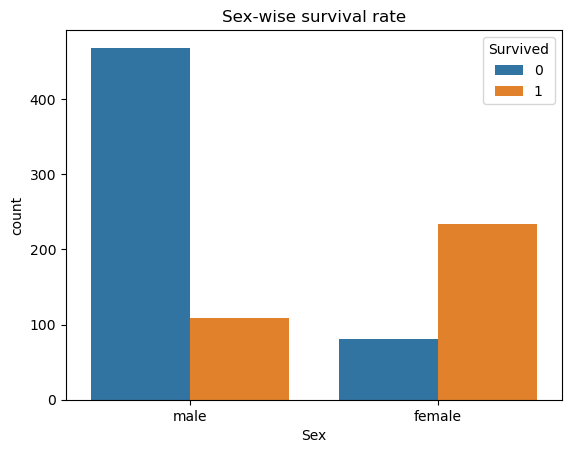

In [18]:
sns.countplot(df, x= "Sex", hue='Survived')
plt.title("Sex-wise survival rate")

Text(0.5, 1.0, 'Embarked-wise survival rate')

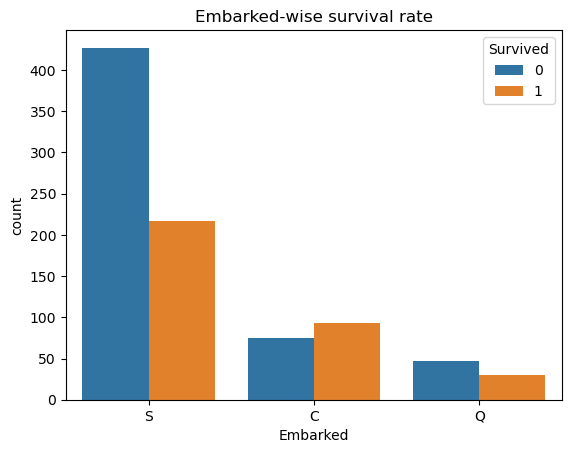

In [19]:
sns.countplot(df, x= "Embarked", hue='Survived')
plt.title("Embarked-wise survival rate")

Text(0.5, 1.0, 'PClass-wise survival rate')

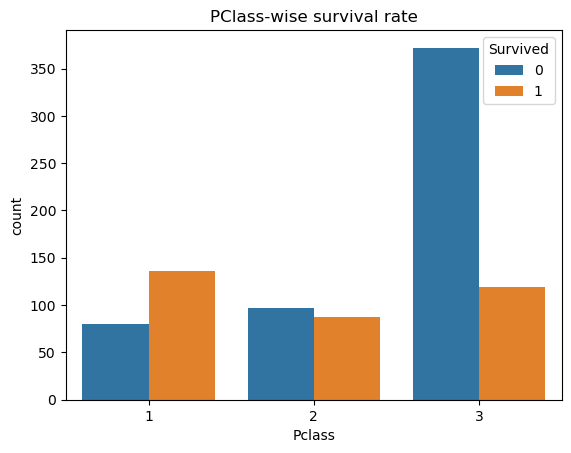

In [20]:
sns.countplot(df, x= "Pclass", hue='Survived')
plt.title("PClass-wise survival rate")

In [23]:
print(df.isnull().sum())
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [24]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [25]:
X_df = df.iloc[:,2:]
Y_df = df.iloc[:,1:2].to_numpy().reshape((-1, 1))
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [29]:
X_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [30]:
Y_df

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [31]:
X_df = df.iloc[:,1:]
X_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C
